Clustering 1 

Importing Required Libraries

In [19]:
import pandas as pd
# import TFBertModel
from transformers import BertTokenizer, BertModel
# import TFBertModel
import tensorflow as tf
from transformers import BertTokenizer, BertModel

from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



 Load and Explore Data

In [5]:
df=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO/,http://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO"
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010

View Category Distribution

In [22]:
df['primaryCategories'].value_counts()

primaryCategories
Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: count, dtype: int64

In [23]:
df['name'].value_counts()

name
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                                                                                8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                                                                            3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers                                                                         2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                                     2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                                                                                    1676
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                                                                                    1425
Fire Kids Edition Tablet, 7 Display, Wi-F

In [3]:
print(f"reviews.text: {df['reviews.text'].isna().sum()}")
print(f"primaryCategories: {df['primaryCategories'].isna().sum()}")




reviews.text: 0
primaryCategories: 0


Load Pretrained BERT Model


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

 Function to Extract BERT Embeddings in Batches

In [ ]:

embedding_file = "bert_embeddings.npy"

def get_bert_embedding(text_list, batch_size=32): #Defines a function named get_bert_embedding that takes a list of texts and an optional batch_size
    all_embeddings = [] #Initializes an empty list to store embeddings for all batches

    for start in range(0, len(text_list), batch_size): #  loop to process the text in batches of size batch_size
        batch = text_list[start:start + batch_size] #Selects a slice of the text list for the current batch
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512) # Tokenizes the batch using the BERT tokenizer

        with torch.no_grad(): #Disables gradient calculation (to save memory and computation) and passes the input batch through the BERT model to get the outputs.
            outputs = model(**inputs)

        batch_embeddings = outputs.pooler_output.detach().numpy() #Extracts the pooled output and converts it to a NumPy array
        all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings) #Concatenates all batch embeddings into a single NumPy array and returns the result


In [ ]:
# Load  saved BERT embeddings if they exist, otherwise compute and save them
if os.path.exists(embedding_file):
    print("Loading saved BERT embeddings")
    bert_embeddings = np.load(embedding_file)
else:
    print("Computing BERT embeddings")
    bert_embeddings = get_bert_embedding(df['reviews.text'].tolist())
    np.save(embedding_file, bert_embeddings)
    print("Embeddings saved.")



Loading saved BERT embeddings...


 BERT Clustering with KMeans

In [ ]:
num_clusters = 5  #Defines the number of clusters to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42) #Initializes the KMeans clustering model 
kmeans.fit(bert_embeddings) #Fits the KMeans model to the BERT embeddings

cluster_labels = kmeans.labels_ #Retrieves the cluster labels after fitting 


Evaluate Clustering Quality + Display Sample Reviews

In [ ]:
sil_score = silhouette_score(bert_embeddings, cluster_labels) #Calculates the Silhouette Score, a metric to measure how well the data points are clustered
print(f'Silhouette Score: {sil_score}') 


df['cluster'] = cluster_labels #Adds a new column "cluster" to the original DataFrame df, assigning each review to a specific cluster based on the kmeans.labels


for i in range(num_clusters): #Loops over all cluster IDs from 0 to num_clusters - 1.

    print(f"\nCluster {i} Reviews:")
    cluster_reviews = df[df['cluster'] == i]['reviews.text'].head(5)  #Filters the DataFrame to get reviews that belong to cluster i and selects the first 5 reviews as a sample
    for review in cluster_reviews: #Loops through each selected review and prints it followed by a dashed line for readability
        print(review)
        print("-" * 50)  
        

Silhouette Score: 0.2303372174501419

Cluster 0 Reviews:
Bulk is always the less expensive way to go for products like these
--------------------------------------------------
Seem to work as well as name brand batteries at a much better price
--------------------------------------------------
just got em so I can't really comment on how good the do the job, good price, quick delivery but have only put two into one of my keyboards but they can go up to a year so who can say after three days
--------------------------------------------------
I don't know if I would buy thus brand again seems like they don't last as long as Duracell
--------------------------------------------------
This my second order and they seem to work as good as name brand and ship to my door.
--------------------------------------------------

Cluster 1 Reviews:
I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
-------------

Visualizing BERT Clusters Using t-SNE

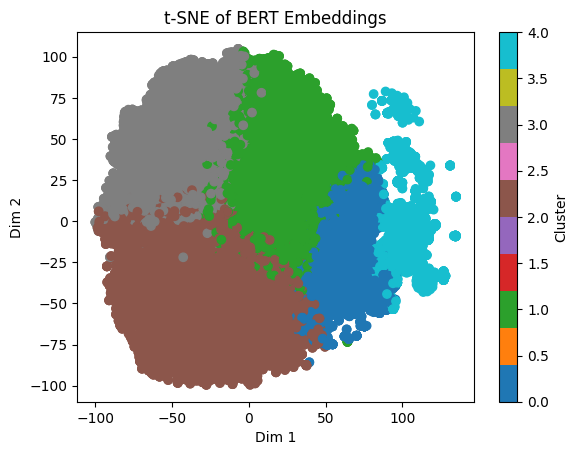

In [20]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_tsne = tsne.fit_transform(bert_embeddings)

plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], c=cluster_labels, cmap='tab10')
plt.title("t-SNE of BERT Embeddings")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(label="Cluster")
plt.show()


Clustering 2 

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import torch
import os
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load dataset
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df = df.dropna(subset=['reviews.text', 'name'])  # Drop rows with missing data

# Group reviews by product name
grouped = df.groupby('name')['reviews.text'].apply(lambda texts: ' '.join(texts)).reset_index()

# Add category and brand info (for labeling later)
product_info = df[['name', 'brand', 'categories', 'primaryCategories']].drop_duplicates(subset=['name'])
grouped = pd.merge(grouped, product_info, on='name', how='left')

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Embedding file to avoid recomputation
embedding_file = "product_embeddings.npy"

# Function to compute BERT embeddings in batches
def get_bert_embedding(text_list, batch_size=16):
    embeddings = []
    for i in tqdm(range(0, len(text_list), batch_size), desc="Embedding Products"):
        batch = text_list[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.pooler_output.detach().numpy())
    return np.vstack(embeddings)

# Load or compute embeddings
if os.path.exists(embedding_file):
    print("Loading saved embeddings...")
    product_embeddings = np.load(embedding_file)
else:
    print("Computing embeddings...")
    product_embeddings = get_bert_embedding(grouped['reviews.text'].tolist())
    np.save(embedding_file, product_embeddings)
    print("Embeddings saved.")

# KMeans Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(product_embeddings)
grouped['cluster'] = kmeans.labels_

# Silhouette Score
sil_score = silhouette_score(product_embeddings, grouped['cluster'])
print(f"\nSilhouette Score: {sil_score:.3f}")

# Preview clusters for manual labeling
for i in range(num_clusters):
    print(f"\n🔹 Cluster {i} Sample Products:")
    sample = grouped[grouped['cluster'] == i].head(5)
    for name in sample['name']:
        print(f"- {name}")

# === Manually assign labels based on inspection ===
cluster_to_category = {
    0: "Ebook Readers",
    1: "Batteries",
    2: "Accessories",
    3: "Non-Electronics",
    4: "Other"
}

# Apply meta-category labels
grouped['meta_category'] = grouped['cluster'].map(cluster_to_category)

# Merge back to original dataset
df = df.merge(grouped[['name', 'meta_category']], on='name', how='left')

# Save result
df.to_csv("amazon_reviews_with_meta_categories.csv", index=False)
print("\n✅ Done! Saved as 'amazon_reviews_with_meta_categories.csv'")


/Users/mdalzahrani/Documents/temp/temp2/venv_temp2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading saved embeddings...

Silhouette Score: 0.305

🔹 Cluster 0 Sample Products:
- All-New Fire 7 Tablet with Alexa, 7" Display, 8 GB - Marine Blue
- All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case
- All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case
- All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers
- All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue

🔹 Cluster 1 Sample Products:
- All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers
- AmazonBasics 15.6-Inch Laptop and Tablet Bag
- AmazonBasics Backpack for Laptops up to 17-inches
- AmazonBasics Ventilated Adjustable Laptop Stand

🔹 Cluster 2 Sample Products:
- All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish
- Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping
- Amazon Echo Sh

Clustering 3

In [ ]:
pip install sentence-transformers pandas scikit-learn matplotlib

In [ ]:
pip install tf-keras

Importing Required Libraries

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


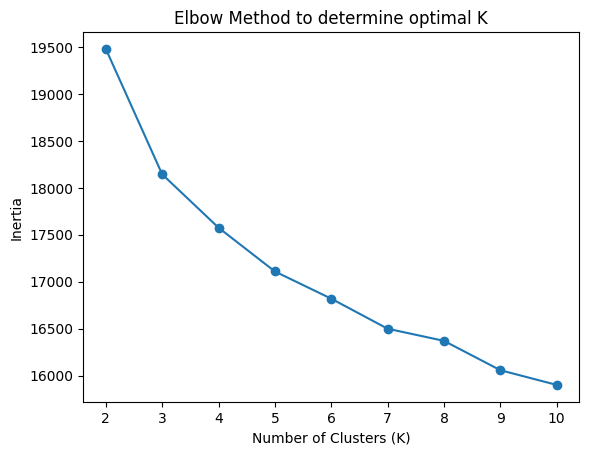

Silhouette Score for KMeans: 0.0875207707285881


In [ ]:

# Load the SentenceTransformer model (MiniLM)
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

# Example: Let's assume you have a dataset with a column named 'reviews.text'
# Load your data
data = pd.read_csv("/Users/aleph/Desktop/untitled folder/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")  # Update this with your actual data file path

# Extract reviews (or text data column)
reviews = data['reviews.text'].dropna().tolist()

# Encode the reviews into embeddings using the SentenceTransformer
embeddings = model.encode(reviews, convert_to_tensor=True)

# Example of clustering using KMeans
k_range = range(2, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings.cpu().detach().numpy())  # Convert tensor to numpy for KMeans
    inertias.append(kmeans.inertia_)

# Plot Elbow Method to determine optimal K
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to determine optimal K')
plt.show()

# Choose the optimal number of clusters (let's say k=5 based on elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(embeddings.cpu().detach().numpy())  # Convert tensor to numpy for KMeans

# Add the cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Calculate the Silhouette Score to evaluate clustering quality
sil_score_kmeans = silhouette_score(embeddings.cpu().detach().numpy(), kmeans.labels_)
print(f"Silhouette Score for KMeans: {sil_score_kmeans}")


Clustering 4

In [ ]:
# Import required libraries
from sentence_transformers import SentenceTransformer  # For converting text to embeddings
import pandas as pd  # For handling data
from sklearn.cluster import KMeans  # For clustering
from sklearn.metrics import silhouette_score  # To evaluate clustering quality
import numpy as np
import matplotlib.pyplot as plt  # For plotting the Elbow curve

# Load the MiniLM Sentence Transformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')  # Lightweight BERT-based model for sentence embeddings

# Load your dataset (make sure the path is correct)
data = pd.read_csv("/Users/aleph/Desktop/untitled folder/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

# Extract the reviews and remove missing values
reviews = data['reviews.text'].dropna().tolist()  # Convert the review column to a clean list

# Convert all reviews into embeddings using the model
embeddings = model.encode(reviews, convert_to_tensor=True)  # Returns a tensor

# Define the number of clusters (based on previous analysis or elbow method)
optimal_k = 6  # Let's assume 6 clusters work well

# Initialize and fit KMeans to the embeddings
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(embeddings.cpu().detach().numpy())  # Convert tensor to numpy array for KMeans

# Assign the resulting cluster labels back to the original dataset
data['cluster'] = kmeans.labels_

# Evaluate the quality of clustering using Silhouette Score
sil_score_kmeans = silhouette_score(embeddings.cpu().detach().numpy(), kmeans.labels_)
print(f"Silhouette Score for KMeans with 6 clusters: {sil_score_kmeans}")

# Display a sample of 5 products from each cluster
for i in range(optimal_k):
    print(f"\nCluster {i} Sample Products:")
    sample_products = data[data['cluster'] == i].sample(5)  # Random sample of 5 products from each cluster
    print(sample_products[['name', 'reviews.text']].head())  # Show product name and review

# Test different values of K (2 to 10) to visualize the Elbow curve
k_range = range(2, 11)
inertias = []

# For each K, compute the inertia (total distance of points to their cluster center)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings.cpu().detach().numpy())
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


Clustering 5

HDeep Scan model 

In [ ]:
# Import required libraries
from sentence_transformers import SentenceTransformer  # For generating embeddings from category text
import pandas as pd  # For data manipulation and reading CSV
from sklearn.cluster import KMeans  # For applying KMeans clustering
from sklearn.metrics import silhouette_score  # For evaluating clustering performance
import numpy as np
import matplotlib.pyplot as plt  # For plotting elbow method chart

# Load the SentenceTransformer model (MiniLM - efficient and fast)
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

# Read the dataset from CSV file (update the path accordingly)
data = pd.read_csv("/Users/aleph/Desktop/untitled folder/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

# Extract the 'categories' column to create a corpus of product categories
corpus_categories = data['categories'].tolist()

# Encode category text into numerical vectors using the transformer model
embeddings_categories = model.encode(corpus_categories, convert_to_tensor=True)

# Define the number of clusters to try
k_values = [4, 5, 6]

# Loop over different cluster numbers to compare performance
for optimal_k in k_values:
    print(f"\nApplying KMeans with {optimal_k} clusters:")

    # Initialize and fit KMeans model with current value of k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(embeddings_categories.cpu().detach().numpy())  # Convert tensor to NumPy for sklearn

    # Assign cluster labels to the original dataset
    data['cluster'] = kmeans.labels_

    # Calculate Silhouette Score to evaluate clustering quality
    sil_score_kmeans = silhouette_score(embeddings_categories.cpu().detach().numpy(), kmeans.labels_)
    print(f"Silhouette Score for KMeans with {optimal_k} clusters: {sil_score_kmeans}")

    # Print sample rows from each cluster
    for i in range(optimal_k):
        print(f"\nCluster {i} Sample Products:")
        sample_products = data[data['cluster'] == i].head(5)  # Get top 5 samples from each cluster
        print(sample_products[['name', 'categories', 'reviews.text']])  # Print selected columns for review

    # Optional: Elbow Method to visually determine optimal k
    k_range = range(2, 11)  # Try values of k from 2 to 10
    inertias = []  # List to store inertia for each k
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings_categories.cpu().detach().numpy())
        inertias.append(kmeans.inertia_)  # Store within-cluster sum of squares (inertia)

    # Plot the Elbow curve
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method to determine optimal K for {optimal_k} clusters')
    plt.show()


In [12]:
for i in range(optimal_k):
    print(f"\nCluster {i} Sample Products:")
    cluster_data = data[data['cluster'] == i]
    sample_products = cluster_data[['name', 'categories', 'reviews.text']].head(10)  # عرض أول 10 منتجات في هذه الكتلة
    print(sample_products)


Cluster 0 Sample Products:
                                                   name  \
8358  AmazonBasics AA Performance Alkaline Batteries...   
8359  AmazonBasics AA Performance Alkaline Batteries...   
8360  AmazonBasics AA Performance Alkaline Batteries...   
8361  AmazonBasics AA Performance Alkaline Batteries...   
8362  AmazonBasics AA Performance Alkaline Batteries...   
8363  AmazonBasics AA Performance Alkaline Batteries...   
8364  AmazonBasics AA Performance Alkaline Batteries...   
8365  AmazonBasics AA Performance Alkaline Batteries...   
8366  AmazonBasics AA Performance Alkaline Batteries...   
8367  AmazonBasics AA Performance Alkaline Batteries...   

                                             categories  \
8358  AA,AAA,Electronics Features,Health,Electronics...   
8359  AA,AAA,Electronics Features,Health,Electronics...   
8360  AA,AAA,Electronics Features,Health,Electronics...   
8361  AA,AAA,Electronics Features,Health,Electronics...   
8362  AA,AAA,Electronics Fe

Clustering 6

In [23]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.metrics import silhouette_score
import pandas as pd

# Load the data
data = pd.read_csv('/Users/aleph/Desktop/untitled folder/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

# Create corpus from unique categories
corpus_categories = data['categories'].unique().tolist()
print(len(corpus_categories), 'unique categories')
print("-" * 50)

# Initialize the SentenceTransformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Convert categories to embeddings
embeddings_categories = model.encode(corpus_categories, convert_to_tensor=True)

# Let's try clustering with 4, 5, and 6 clusters
k_values = [4, 5, 6]
for k in k_values:
    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings_categories)
    
    # Evaluate the clustering performance using silhouette score
    sil_score_kmeans = silhouette_score(embeddings_categories, kmeans.labels_)
    print(f"Silhouette Score for KMeans with {k} clusters: {sil_score_kmeans}")
    
    # Add cluster labels to the categories
    category_cluster_map = {corpus_categories[i]: kmeans.labels_[i] for i in range(len(corpus_categories))}
    
    # Create a DataFrame to map categories with their cluster
    cluster_df = pd.DataFrame(list(category_cluster_map.items()), columns=["category", "cluster"])

    # Print out sample categories from each cluster
    for cluster_num in range(k):
        print(f"\nCluster {cluster_num} Sample Categories:")
        sample_categories = cluster_df[cluster_df['cluster'] == cluster_num]['category'].tolist()
        for category in sample_categories[:5]:  # Print first 5 sample categories
            print(f"- {category}")
    
    print("-" * 50)



60 unique categories
--------------------------------------------------
Silhouette Score for KMeans with 4 clusters: 0.2178378850221634

Cluster 0 Sample Categories:
- Office,File Jackets & File Pockets,File Folders & Accessories,Files & Supplies,Office Solutions,Office Supplies,Office Product,Business & Industrial,Office & School Supplies,Expanding File Jackets Pockets,Smead,Office Products,File & Folder Accessories,Filing, Storage & Binding,Accessories,Expanding Files,See more File Pocket Expanding Folder Office Organizer ...,Filing Products,Expanding Wallets,Filing & Organizers,Expanding File Jackets & Pockets
- Standard Litter Boxes,Litter Boxes,Cat Supplies,Pet Supplies,Top Cat Supplies,Pet Products
- Carriers & Totes,Hard-Sided Carriers,Crates Kennels,Pet Supplies: International Shipping Available,Cat Supplies,Pet Supplies,Carriers & Crates,Custom Stores,Dog Supplies,Pet Products,Top Selection from AmazonPets
- Crate Training,Crates Kennels,Pet Supplies,Why Keep Them Waiting Prim

In [26]:

    # Dictionary to store the most common words for each cluster
    cluster_words = {}

    # ignore some recurrent words
    ignored_words = ['Amazon', 'from', 'To']

    # Process each cluster to get the most common words
    for i in range(k):
        # Extract the categories belonging to the current cluster
        cluster_categories = cluster_df[cluster_df['cluster'] == i]['category'].tolist()

        # Clean and prepare the cluster text
        clean_cluster = re.sub(r'[^A-Za-z0-9\s]', '', " ".join(cluster_categories))
        all_words = [word.strip().lower() for word in clean_cluster.split()]

        # Count frequency of each word and get the top 10 most common
        word_counts = Counter(all_words)
        for word in ignored_words:
            if word.lower() in word_counts:
                del word_counts[word.lower()]
        
        # Get the 10 most common words
        most_common_words = word_counts.most_common(10)

        # Store the results in the dictionary
        cluster_words[f"Cluster {i}"] = most_common_words

        # Print results for inspection
        print(f"CLUSTER {i}:")
        for word, count in most_common_words:
            print(f"{word} ({count})")
        print("-" * 50)

    print("-" * 50)

CLUSTER 0:
suppliespet (5)
kennelspet (3)
storesdog (3)
selection (3)
suppliestop (2)
productstop (2)
crate (2)
trainingcrates (2)
standard (1)
litter (1)
--------------------------------------------------
CLUSTER 1:
device (4)
accessoriescomputer (2)
accessories (2)
accessoriesdigital (2)
accessoriesusb (1)
cablescomputers (1)
peripheralselectronicscablescables (1)
interconnects (1)
electronics (1)
featurescomputers (1)
--------------------------------------------------
CLUSTER 2:
home (24)
device (19)
audio (13)
speakers (13)
book (12)
smart (11)
ebook (9)
accessoriesamazon (8)
adapters (8)
readercomputers (8)
--------------------------------------------------
CLUSTER 3:
fire (15)
tabletsamazon (12)
tabletscomputerstablets (8)
tabletscomputers (7)
ebook (7)
tablets (6)
tabletstablets (5)
readers (5)
networkingtabletsall (5)
tabletstabletsall (5)
--------------------------------------------------
CLUSTER 4:
householdcamcorder (2)
batteriescamera (2)
photobatterieshousehold (2)
batteri